# 2章: 確率的プログラミング: コンピュータの助けを借りる

必要なモジュールの読み込み

In [369]:
import os
import numpy as np
from matplotlib import pyplot as plt
from cmdstanpy import CmdStanModel
import arviz as az

az.style.use("arviz-darkgrid")
np.random.seed(0)

script_dir = os.path.dirname('chapter2.ipynb')

### 統計モデルの記述とサンプリングの実行

In [370]:
N = 40  # アリスのデザインA案の表示数
a = 2   # アリスのデザインA案のクリック数

file_path = os.path.join(script_dir, 'model.stan')
model = CmdStanModel(stan_file=file_path)

data = {'N': N, 'a': a}

fit = model.sample(
  data=data,
  chains=2,
  seed=0,
  iter_warmup=1000,
  iter_sampling=5000,
  show_progress=True
)

05:14:14 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

05:14:14 - cmdstanpy - INFO - CmdStan done processing.


In [371]:
cmdstanpy_data = az.from_cmdstanpy(
    posterior=fit,
    log_likelihood="lp__",
)

In [372]:
print(fit.diagnose())

Processing csv files: /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmp3poc1wbc/model01f0wvf5/model-20230402051414_1.csv, /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmp3poc1wbc/model01f0wvf5/model-20230402051414_2.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

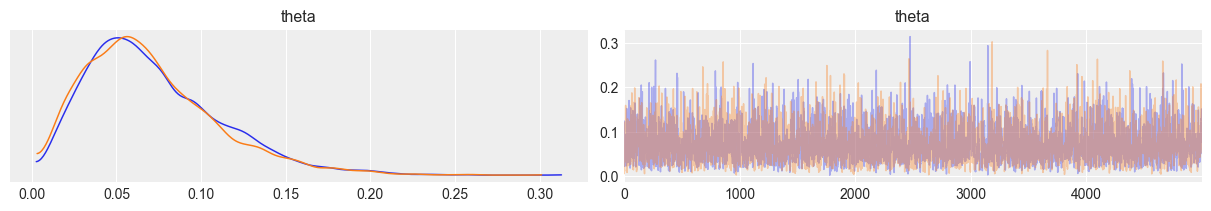

In [373]:
az.plot_trace(cmdstanpy_data.posterior, compact=False) # 事後分布からのサンプルの可視化

In [374]:
fit.summary() # 事後分布の要約統計量

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,-11.348300,0.012931,0.766539,-12.924500,-11.045700,-10.809500,3513.82,30823.0,1.00013
theta,0.070999,0.000644,0.039608,0.019248,0.063778,0.145619,3786.57,33215.5,1.00080


CmdStanPyによって推論された，アリスのデザインA案のクリック率の事後分布

<Axes: title={'center': 'theta'}>

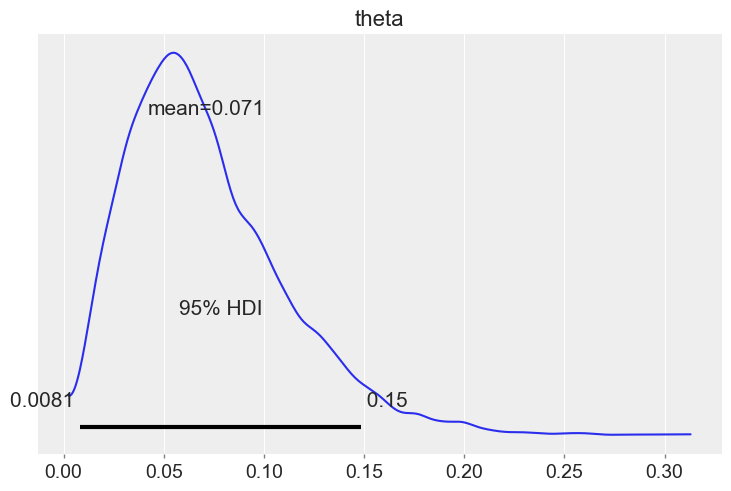

In [375]:
az.plot_posterior(cmdstanpy_data.posterior,hdi_prob=0.95) # 事後分布の可視化

In [376]:
theta_samples = fit.stan_variable('theta')

print((theta_samples - 0.01 > 0).mean())

0.9917


In [377]:
N_a = 40  # アリスのデザインA案の表示数
a = 2   # アリスのデザインA案のクリック数
N_b = 50  # アリスのデザインB案の表示数
b = 4   # アリスのデザインB案のクリック数

file_path = os.path.join(script_dir, 'model_2.stan')
model = CmdStanModel(stan_file=file_path)

data = {'N_a': N_a, 'N_b': N_b, 'a': a, 'b': b}

fit = model.sample(
  data=data,
  chains=2,
  seed=0,
  iter_warmup=1000,
  iter_sampling=5000,
  show_progress=True
)


05:14:15 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

05:14:15 - cmdstanpy - INFO - CmdStan done processing.


In [378]:
cmdstanpy_data = az.from_cmdstanpy(
    posterior=fit,
    log_likelihood="lp__",
)

In [379]:
print(fit.diagnose())

Processing csv files: /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmp3poc1wbc/model_2651ao_h9/model_2-20230402051415_1.csv, /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmp3poc1wbc/model_2651ao_h9/model_2-20230402051415_2.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



アリスのデザイン案AおよびBのクリック率のサンプルの可視化

array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

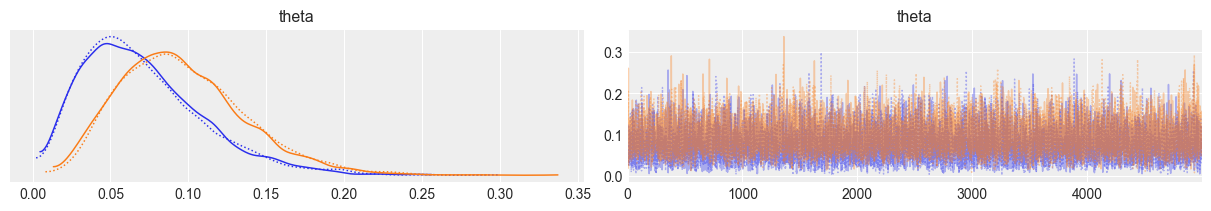

In [380]:
az.plot_trace(cmdstanpy_data.posterior, compact=True) # 事後分布からのサンプルの可視化

In [381]:
theta_samples = fit.stan_variable('theta')

print((theta_samples[:, 1] - theta_samples[:, 0] > 0).mean())

0.6902


In [382]:
N_a = 1280  # ボブのデザインA案の表示数
a = 64   # ボブのデザインA案のクリック数
N_b = 1600  # ボブのデザインB案の表示数
b = 128   # ボブのデザインB案のクリック数

file_path = os.path.join(script_dir, 'model_2.stan')
model = CmdStanModel(stan_file=file_path)

data = {'N_a': N_a, 'N_b': N_b, 'a': a, 'b': b}

fit = model.sample(
  data=data,
  chains=2,
  seed=0,
  iter_warmup=1000,
  iter_sampling=5000,
  show_progress=True
)

cmdstanpy_data = az.from_cmdstanpy(
    posterior=fit,
    log_likelihood="lp__",
)

print(fit.diagnose())

05:14:16 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

05:14:16 - cmdstanpy - INFO - CmdStan done processing.



Processing csv files: /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmp3poc1wbc/model_283mcpmp9/model_2-20230402051416_1.csv, /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmp3poc1wbc/model_283mcpmp9/model_2-20230402051416_2.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

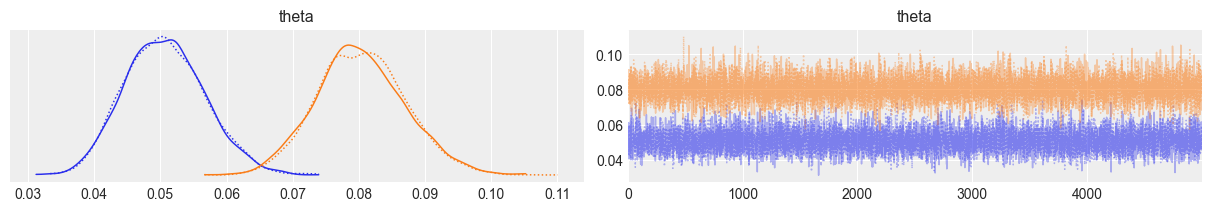

In [383]:
az.plot_trace(cmdstanpy_data.posterior, compact=True) # 事後分布からのサンプルの可視化

In [384]:
theta_samples = fit.stan_variable('theta')

print((theta_samples[:, 1] - theta_samples[:, 0] > 0).mean())

0.9996


## 真のレビュースコア

In [385]:
n_a = [20, 10, 36, 91, 170]
data = [1 for _ in range(n_a[0])]
data += [2 for _ in range(n_a[1])]
data += [3 for _ in range(n_a[2])]
data += [4 for _ in range(n_a[3])]
data += [5 for _ in range(n_a[4])]
data = np.array(data)

file_path = os.path.join(script_dir, 'model_a.stan')
model = CmdStanModel(stan_file=file_path)

data = {'N': len(data), 'K': 5, 'x': data}

fit = model.sample(
  data=data,
  chains=2,
  seed=0,
  iter_warmup=1000,
  iter_sampling=5000,
  show_progress=True
)

cmdstanpy_data = az.from_cmdstanpy(
    posterior=fit,
    log_likelihood="lp__",
)

print(fit.diagnose())

05:14:17 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

05:14:18 - cmdstanpy - INFO - CmdStan done processing.



Processing csv files: /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmp3poc1wbc/model_am7oe8lay/model_a-20230402051417_1.csv, /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmp3poc1wbc/model_am7oe8lay/model_a-20230402051417_2.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

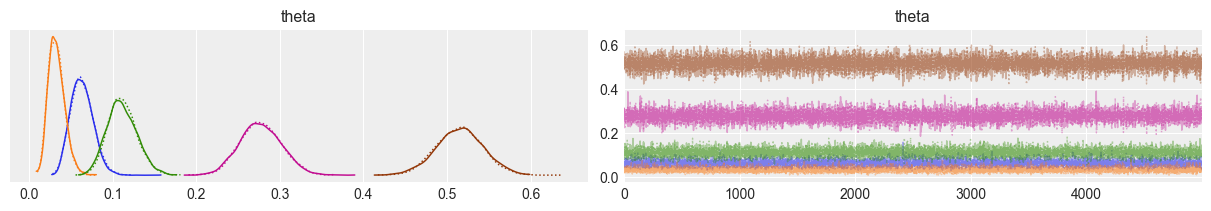

In [386]:
az.plot_trace(cmdstanpy_data.posterior, compact=True) # 事後分布からのサンプルの可視化

商品Aについて各レビュースコアが生み出される確率 $\boldsymbol{\theta}$ の事後分布の可視化

array([[<Axes: title={'center': 'theta\n0'}>,
        <Axes: title={'center': 'theta\n1'}>,
        <Axes: title={'center': 'theta\n2'}>],
       [<Axes: title={'center': 'theta\n3'}>,
        <Axes: title={'center': 'theta\n4'}>, <Axes: >]], dtype=object)

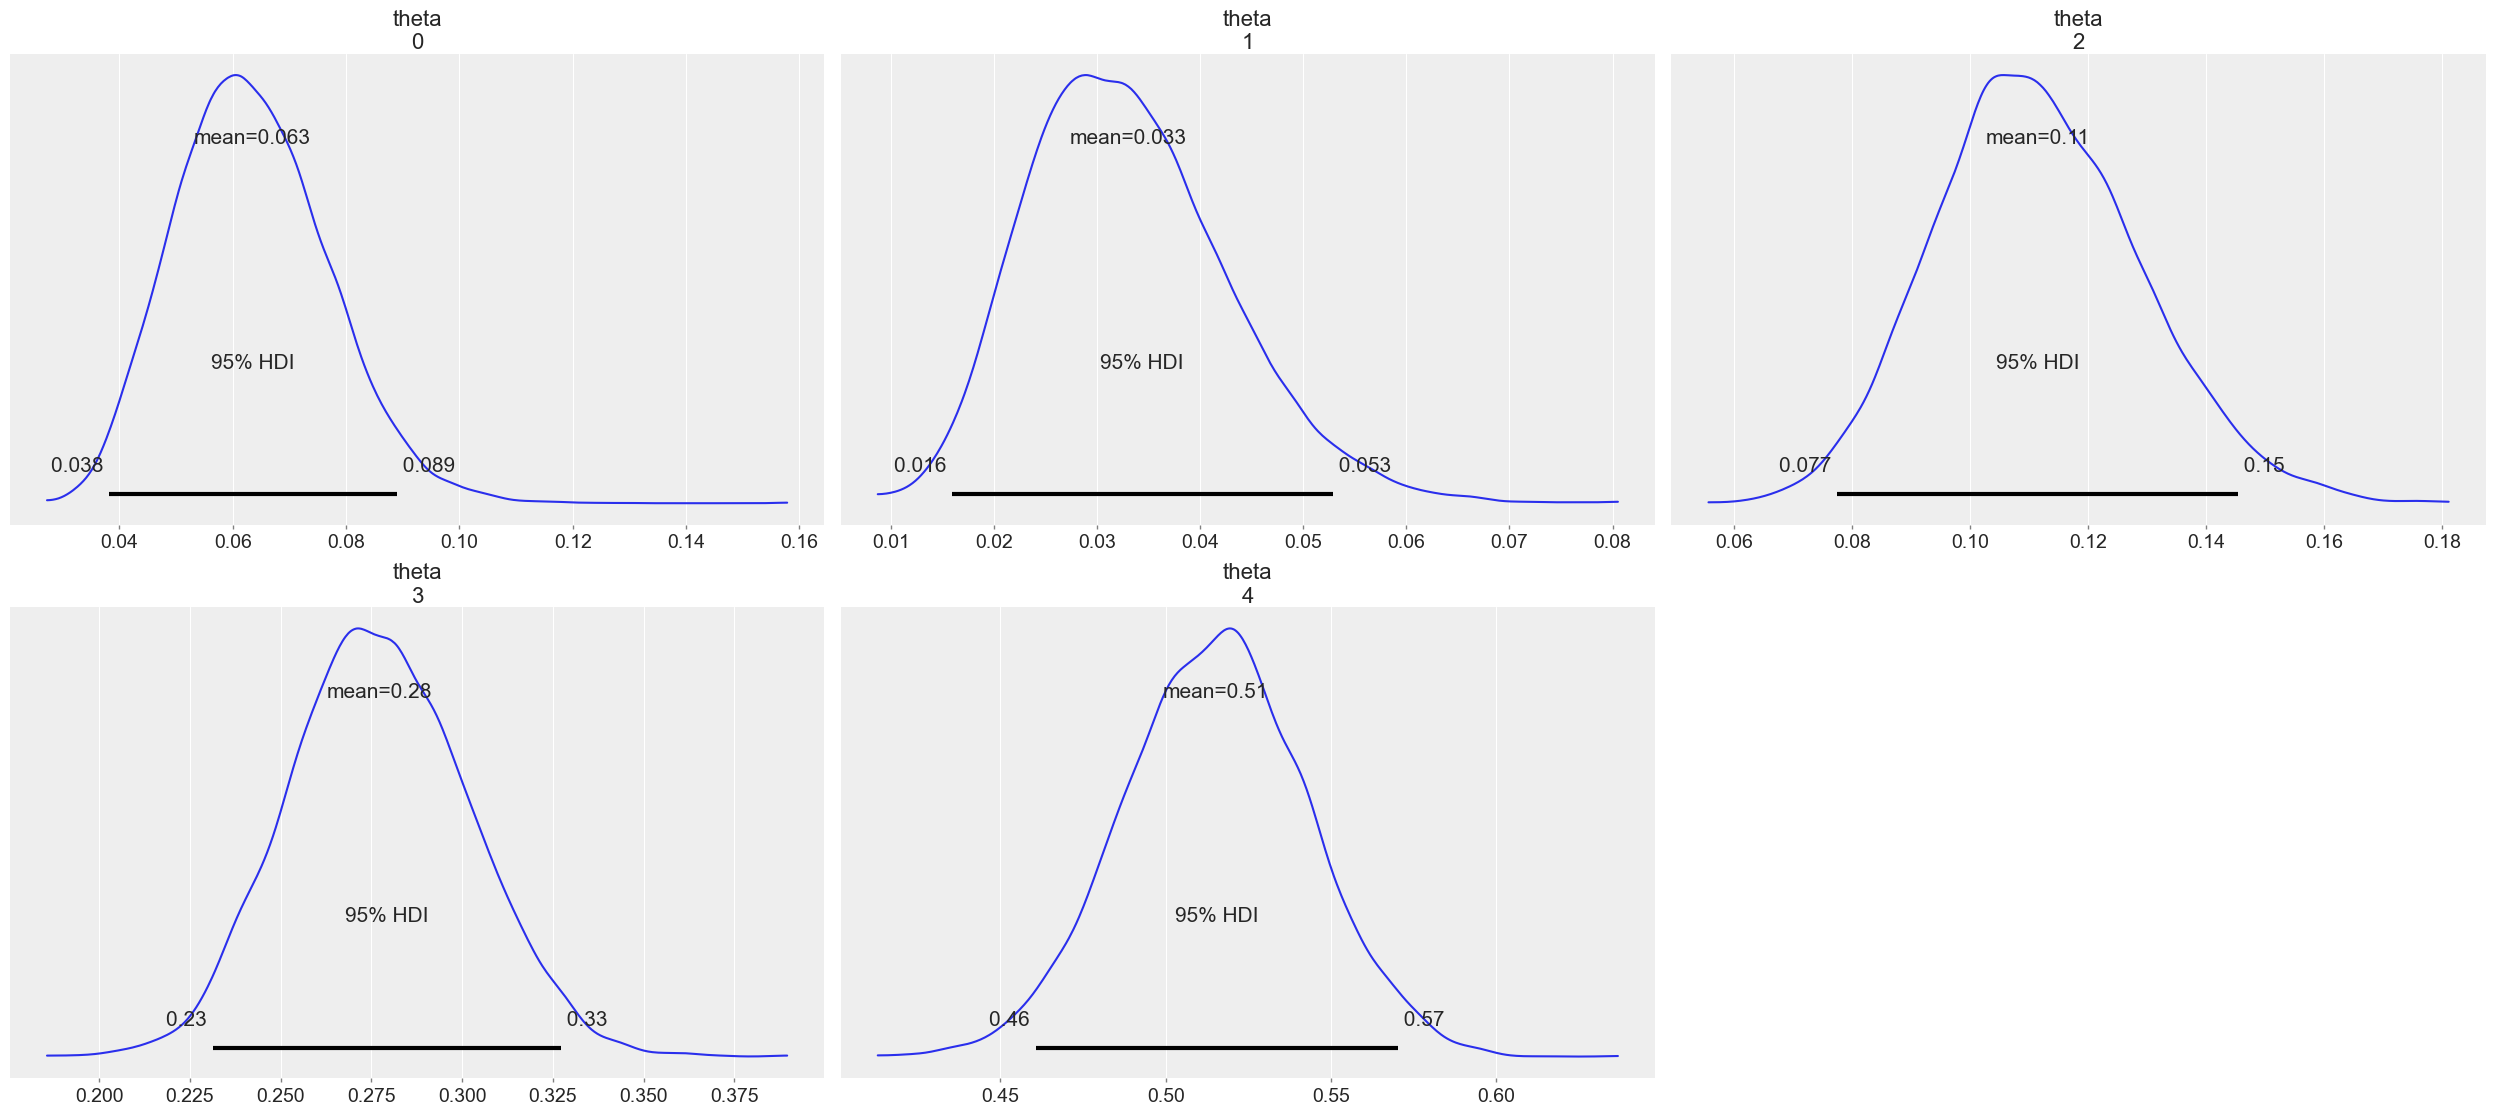

In [387]:
az.plot_posterior(cmdstanpy_data.posterior,hdi_prob=0.95) # 事後分布の可視化

In [388]:
theta_samples = fit.stan_variable('theta')
weights = np.array([1, 2, 3, 4, 5])
m_a = [sum(row * weights) for row in theta_samples]
#m_a = np.matmul(trace_a['theta'], weights)

商品Aに対するレビュースコアの平均点 $m$ の確率密度関数

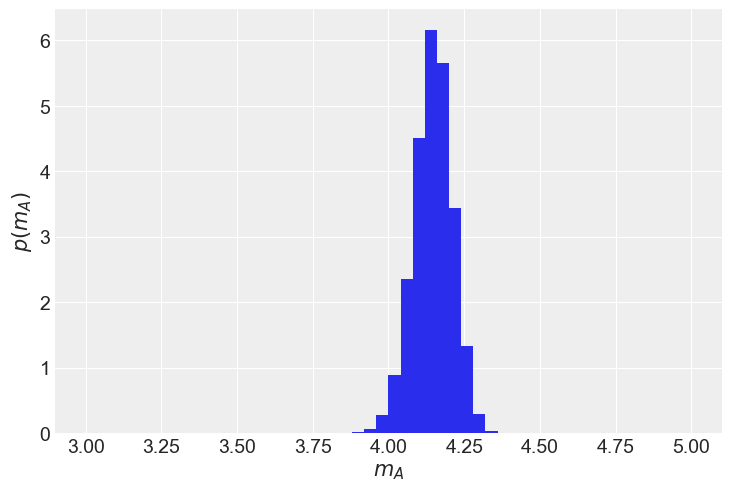

In [389]:
plt.hist(m_a, range=(3, 5), bins=50, density=True)
plt.xlabel(r'$m_A$')
plt.ylabel(r'$p(m_A)$')
plt.show()

商品Bについて各レビュースコアが生み出される確率 $\boldsymbol{\theta}$ のサンプルの可視化

In [390]:
n_b = np.array([0, 0, 4, 0, 6])


file_path = os.path.join(script_dir, 'model_b.stan')
model = CmdStanModel(stan_file=file_path)

data = {'N': n_b.sum(), 'K': 5, 'n_b': n_b}

fit = model.sample(
  data=data,
  chains=2,
  seed=0,
  iter_warmup=1000,
  iter_sampling=5000,
  show_progress=True
)

cmdstanpy_data = az.from_cmdstanpy(
    posterior=fit,
    log_likelihood="lp__",
)

print(fit.diagnose())

05:14:19 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

05:14:19 - cmdstanpy - INFO - CmdStan done processing.



Processing csv files: /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmp3poc1wbc/model_bkddu9cyd/model_b-20230402051419_1.csv, /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmp3poc1wbc/model_bkddu9cyd/model_b-20230402051419_2.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

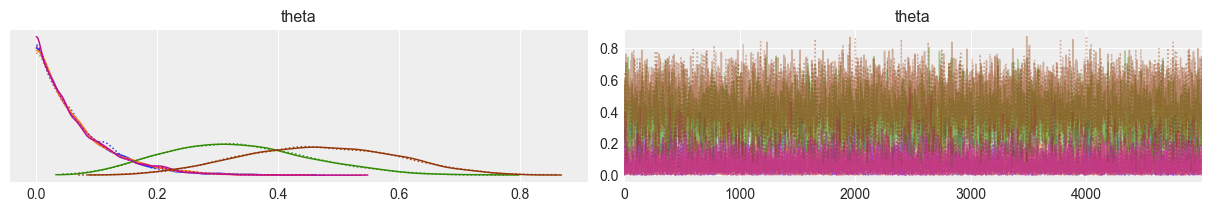

In [391]:
az.plot_trace(cmdstanpy_data.posterior, compact=True) # 事後分布からのサンプルの可視化

商品AとBのレビュースコアの平均点の確率密度関数

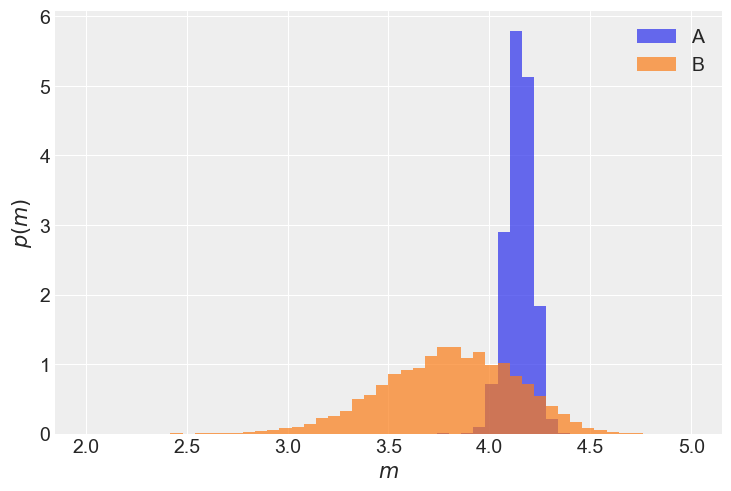

In [392]:
theta_samples = fit.stan_variable('theta')

m_b = [sum(row * weights) for row in theta_samples]
plt.hist(m_a, range=(2, 5), bins=50, density=True, label='A',
         alpha=0.7)
plt.hist(m_b, range=(2, 5), bins=50, density=True, label='B',
         alpha=0.7)
plt.xlabel(r'$m$')
plt.ylabel(r'$p(m)$')
plt.legend()
plt.show()

# 滞在時間をテストする

あるウェブサイトにおける滞在時間（秒）のヒストグラム

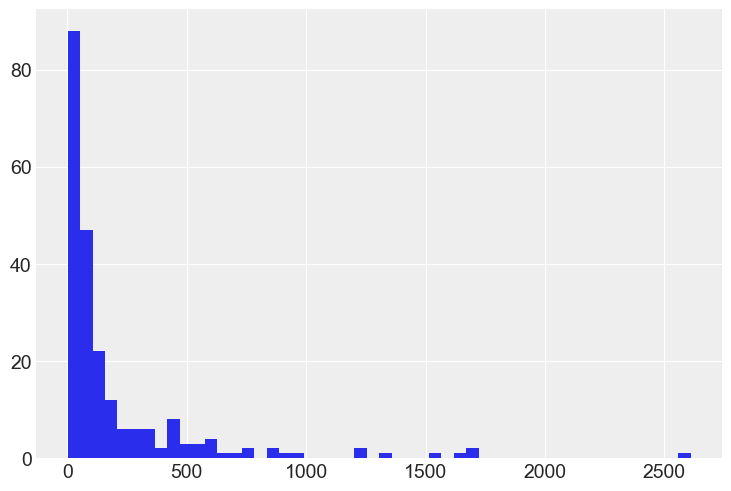

In [393]:
import urllib
url = 'https://www.oreilly.co.jp/pub/9784873119168/data/time-on-page.csv'
response = urllib.request.urlopen(url)
data = [int(row.strip()) for row in response.readlines()]
plt.hist(data, bins=50)
plt.show()

さまざまな指数分布の例

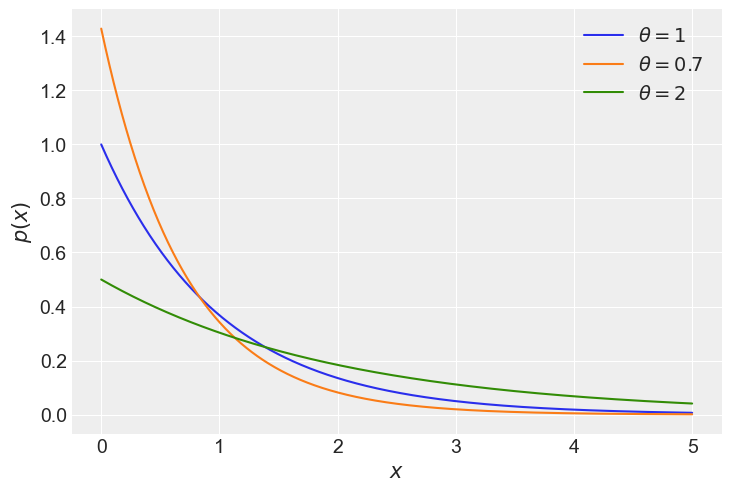

In [394]:
from scipy import stats
xs = np.linspace(0, 5, 1001)
plt.plot(xs, stats.expon.pdf(xs, 0, 1), label=r'$\theta = 1$')
plt.plot(xs, stats.expon.pdf(xs, 0, 0.7), label=r'$\theta = 0.7$')
plt.plot(xs, stats.expon.pdf(xs, 0, 2), label=r'$\theta = 2$')
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')
plt.legend()
plt.show()

確率変数 $\theta$ のサンプルの軌跡

In [395]:
file_path = os.path.join(script_dir, 'model_3.stan')
model = CmdStanModel(stan_file=file_path)

data = {'N': len(data), 'obs': np.array(data)}

fit = model.sample(
  data=data,
  chains=2,
  seed=0,
  iter_warmup=1000,
  iter_sampling=5000,
  show_progress=True
)

cmdstanpy_data = az.from_cmdstanpy(
    posterior=fit,
    log_likelihood="lp__",
)

print(fit.diagnose())

05:14:21 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

05:14:21 - cmdstanpy - INFO - CmdStan done processing.
05:14:21 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: exponential_lpdf: Inverse scale parameter is 0, but must be positive finite! (in '/var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmpw42mip6y/tmpp3h071cz.stan', line 12, column 4 to column 34)
	Exception: exponential_lpdf: Inverse scale parameter is 0, but must be positive finite! (in '/var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmpw42mip6y/tmpp3h071cz.stan', line 12, column 4 to column 34)
	Exception: exponential_lpdf: Inverse scale parameter is 0, but must be positive finite! (in '/var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmpw42mip6y/tmpp3h071cz.stan', line 12, column 4 to column 34)
	Exception: exponential_lpdf: Inverse scale parameter is 0, but must be positive finite! (in '/var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmpw42mip6y/tmpp3h071cz.stan', line 12, column 4 to column 34)
	Exception: exponential_lpdf: Inverse scale parameter is


Processing csv files: /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmp3poc1wbc/model_3c1tx5kvd/model_3-20230402051421_1.csv, /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmp3poc1wbc/model_3c1tx5kvd/model_3-20230402051421_2.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

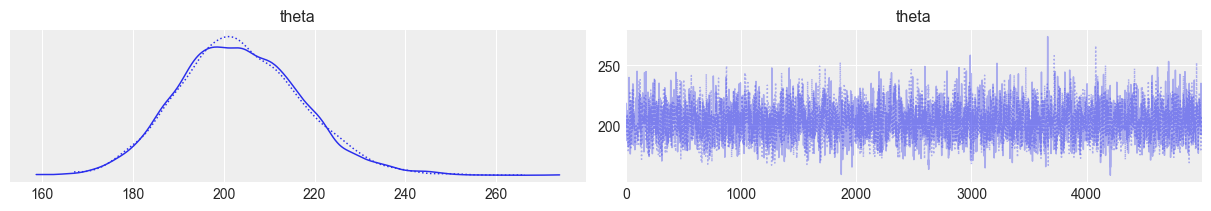

In [396]:
az.plot_trace(cmdstanpy_data.posterior, compact=True) # 事後分布からのサンプルの可視化

確率変数 $\theta$ の事後分布

<Axes: title={'center': 'theta'}>

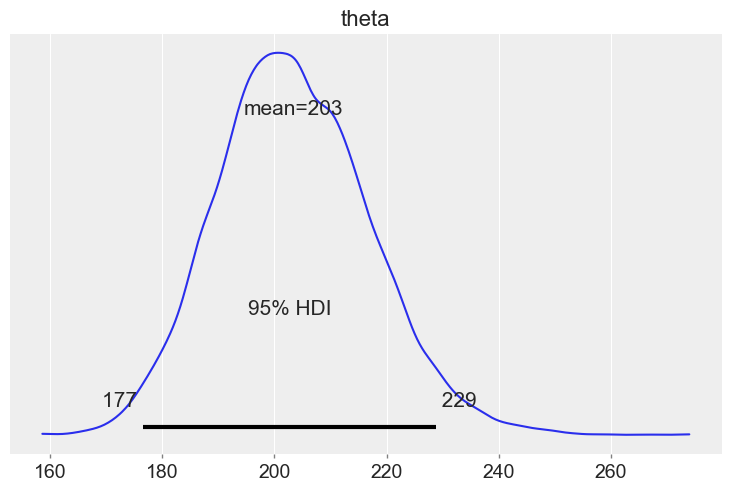

In [397]:
az.plot_posterior(cmdstanpy_data.posterior,hdi_prob=0.95) # 事後分布の可視化

## なぜベイズ推論による統計的仮説検定を行うか

アリスのレポートにおけるクリック数の標本分布。
合計クリック数 $a$ が4以上となる部分を異なる色で示した。

/var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/ipykernel_67047/3755135786.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


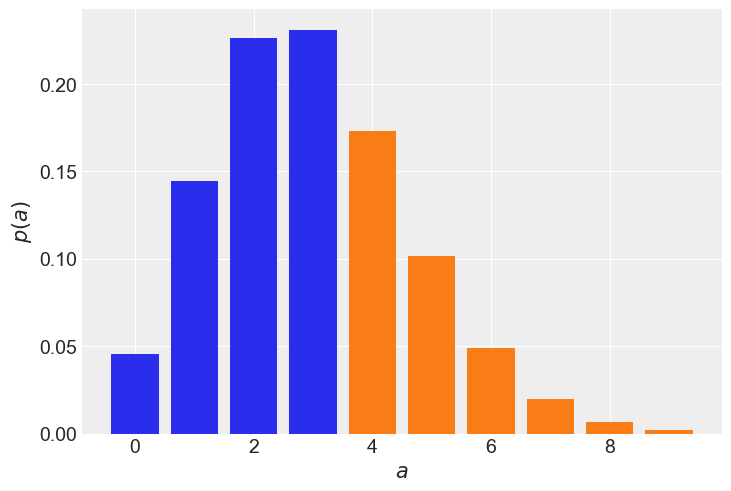

In [398]:
x = 10
N = 50
theta = 0.06
thres = 4
plt.bar(range(thres), stats.binom.pmf(range(thres), N, theta), linewidth=0)
plt.bar(range(thres, x), stats.binom.pmf(range(thres, x), N, theta), linewidth=0)
plt.xlabel(r'$a$')
plt.ylabel(r'$p(a)$')
plt.tight_layout()
plt.show()

$a$ が `thres` 以上の値を取る確率

In [399]:
stats.binom.pmf(range(thres, 10000), N, theta).sum()


0.3526966279036829

ボブのレポートにおけるクリック数の標本分布。合計クリック数 $a$ が128以上となる部分を異なる色で示した。

/var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/ipykernel_67047/3914446970.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


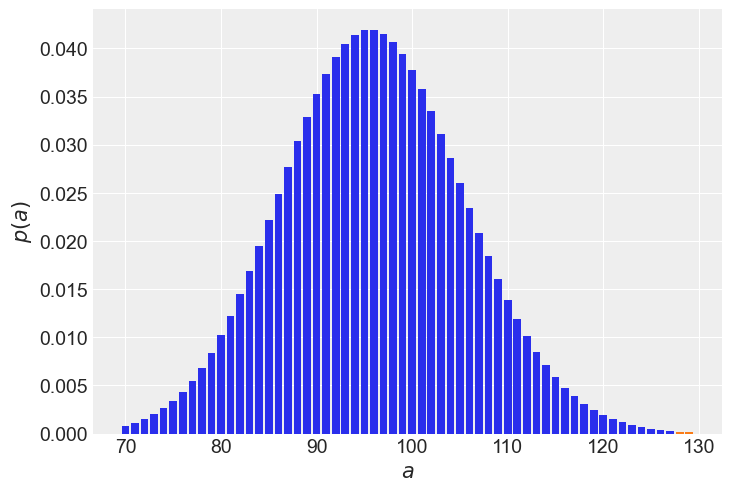

In [400]:
minx = 70
x = 130
N = 1600
theta = 0.06
thres = 128
plt.bar(range(minx, thres), stats.binom.pmf(range(minx, thres), N, theta), linewidth=0)
plt.bar(range(thres, x), stats.binom.pmf(range(thres, x), N, theta), linewidth=0)
plt.xlabel(r'$a$')
plt.ylabel(r'$p(a)$')
plt.tight_layout()
plt.show()

$a$ が `thres` 以上の値を取る確率

In [401]:
stats.binom.pmf(range(thres, 10000), N, theta).sum()

0.0007341521761379299